In [17]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
def read_log_file_to_df(path):
    """ Reads data from path to dataframe for analysis. """

    with open(path, "r") as f:
        lines = f.readlines()

    headers = lines[0].strip().split()
    data = [x.strip().split() for x in lines[1:]]
    
    df = pd.DataFrame(data, columns=headers)
    
    for col in df.columns:
        if col == "epoch":
            df[col] = df[col].astype(int)
        else:
            df[col] = df[col].astype(float)
            
    return df

In [22]:
df_7lp = read_log_file_to_df("../data/7lp_logs.txt")
df_9lp = read_log_file_to_df("../data/9lp_logs.txt")
df_cnn = read_log_file_to_df("../data/cnn_4conv_logs.txt")

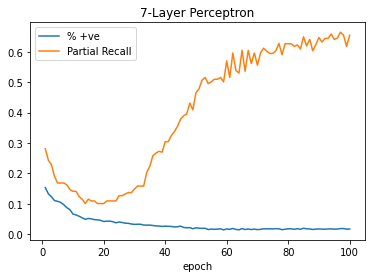

In [26]:
plt.plot(df_7lp['epoch'], df_7lp['test/nnPU/perc_pos'], label="% +ve")
plt.plot(df_7lp['epoch'], df_7lp['test/nnPU/recall'], label="Partial Recall")
plt.xlabel('epoch')
plt.title('7-Layer Perceptron')
plt.legend()
plt.show()

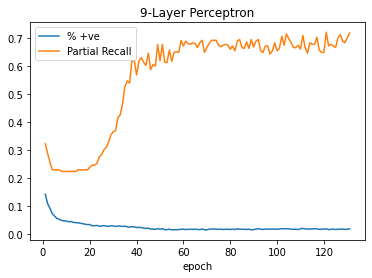

In [27]:
plt.plot(df_9lp['epoch'], df_9lp['test/nnPU/perc_pos'], label="% +ve")
plt.plot(df_9lp['epoch'], df_9lp['test/nnPU/recall'], label="Partial Recall")
plt.xlabel('epoch')
plt.title('9-Layer Perceptron')
plt.legend()
plt.show()

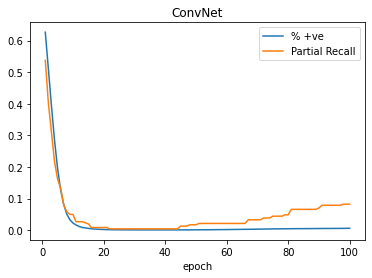

In [28]:
plt.plot(df_cnn['epoch'], df_cnn['test/nnPU/perc_pos'], label="% +ve")
plt.plot(df_cnn['epoch'], df_cnn['test/nnPU/recall'], label="Partial Recall")
plt.xlabel('epoch')
plt.title('ConvNet')
plt.legend()
plt.show()

In [80]:
def read_script_logs(path):

    with open(path, 'r') as f:
        lines = f.readlines()

    lines = lines[9:]

    headers = lines[0].strip().split()

    data = [x.strip().split() for x in lines[1:]]
    data = [x for x in data if x[0] != 'this']

    def filter_data(x):
        if len(x) > 1:
            if x[1] in ('iters/sec.', 'total', 'iter,'):
                return False

        return True

    data = [x for x in data if filter_data(x)]
    _ = data.pop()

    for i in range(len(data)):
        data[i][0] = data[i][0].split('J')[1]

    df = pd.DataFrame(data, columns=headers)

    for col in df.columns:
        if col == "epoch":
            df[col] = df[col].astype(int)
        else:
            df[col] = df[col].astype(float)
            
    return df

In [81]:
df = read_script_logs('../data/9lp_logs_new.txt')

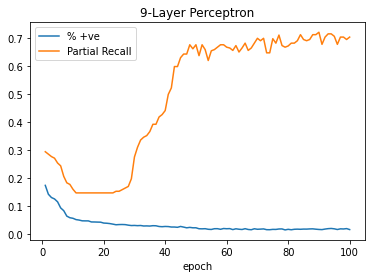

In [84]:
plt.plot(df['epoch'], df['test/nnPU/percPos'], label="% +ve")
# plt.plot(df['epoch'], df['test/nnPU/percPosNF'], label="% +ve non fake")
plt.plot(df['epoch'], df['test/nnPU/recall'], label="Partial Recall")
plt.xlabel('epoch')
plt.title('9-Layer Perceptron')
plt.legend()
plt.show()